In [1]:
from imputationLibrary import decompose, forwardFilling, hotDeck, meanImputation, movingAverage, splineInterpolation, randomSampleImputation, nature
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from sklearn import preprocessing
from datetime import datetime, timedelta

In [ ]:
df = pd.read_csv(r'output\/CompleteDengue.csv',index_col=0, parse_dates=True)
df_train = df.loc['1990-04-30':'2006-07-16'] #Selecting training data
df_test = df.loc['2006-07-23':, df_train.columns] #Selecting test data
period = 7
df_filled = df_train.fillna(0)
df_filled_test = df_test.fillna(0)

In [3]:
df_decomposed_resid = pd.DataFrame()
df_decomposed_trend = pd.DataFrame()
df_decomposed_seasonal = pd.DataFrame()

df_decomposed_resid_test = pd.DataFrame()
df_decomposed_trend_test = pd.DataFrame()
df_decomposed_seasonal_test = pd.DataFrame()

df_nan = df_train.isna()
df_nan_test = df_test.isna()

In [4]:
def plot_ac(df, name):
    df = df.astype(float)
    #scaled = preprocessing.StandardScaler().fit_transform([np.array(df.fillna(0))])
    normalized = preprocessing.normalize(np.array([np.array(df.fillna(0))]))
    corr = signal.correlate(normalized, normalized, mode='full')
    plt.plot(corr[0], 'o-', markersize=2)
    plt.axhline(2/np.sqrt(len(df)), ls=':')
    plt.axhline(-2/np.sqrt(len(df)), ls=':')
    plt.title(name + ' auto-correlation')
    plt.show()

In [5]:
def decompose_and_plot(ts, flag_plot = False):
    ts_decomposed = decompose.decompose(ts, period)
    if flag_plot:
        ts_decomposed.plot()
        plt.show()
        print("Resid is white noise? ", nature.isWhiteNoise(ts_decomposed.resid))
        print("Resid is seasonal noise? ", nature.isSeasonal(ts_decomposed.resid))
        print("Resid is trended noise? ", nature.isTrended(ts_decomposed.resid, period))
        print("Resid is seasonal and trended noise? ", nature.isTrendedAndSeasonal(ts_decomposed.resid, period))
        plot_ac(ts_decomposed.resid, "Resid")
        plot_ac(ts_decomposed.trend, "Trend")
        plot_ac(ts_decomposed.seasonal, "Seasonal")
    return ts_decomposed.resid, ts_decomposed.trend, ts_decomposed.seasonal
    

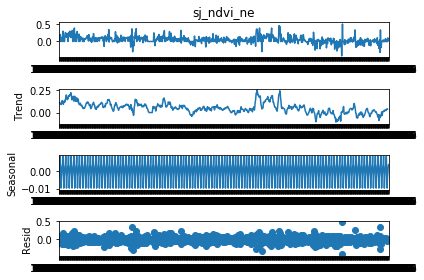

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


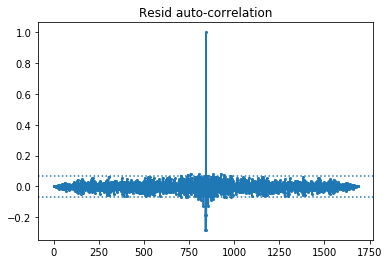

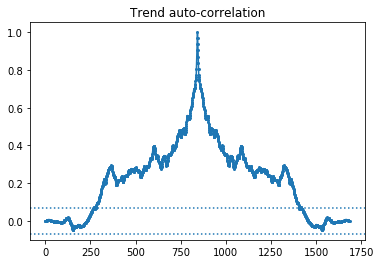

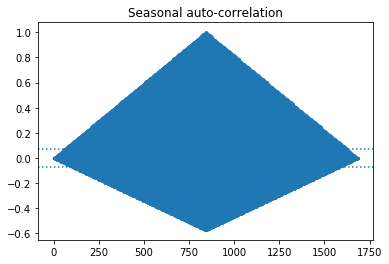

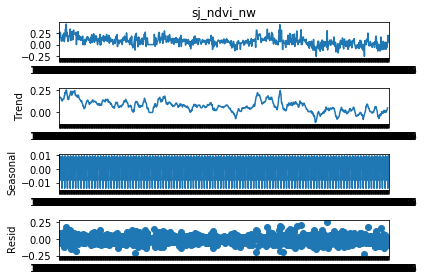

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


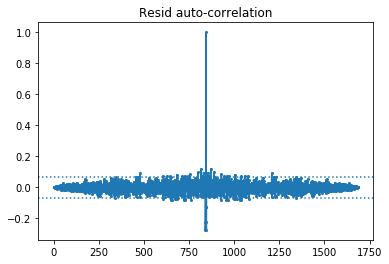

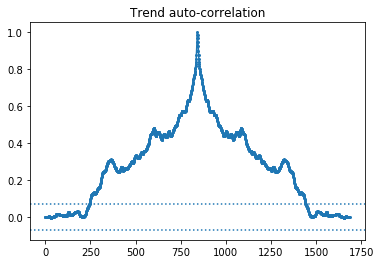

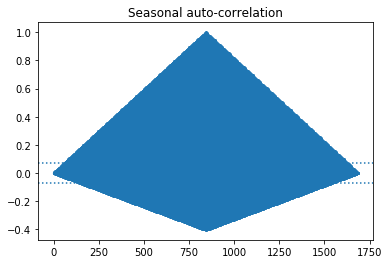

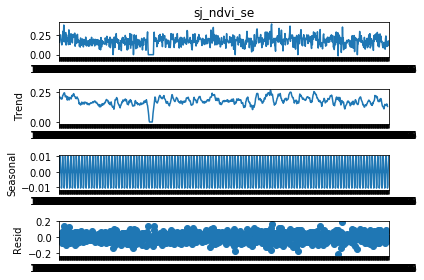

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


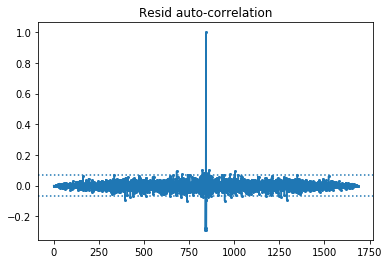

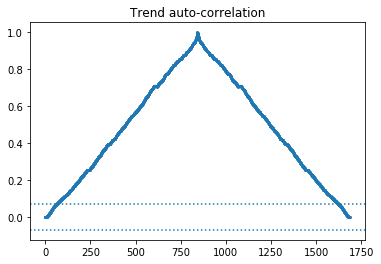

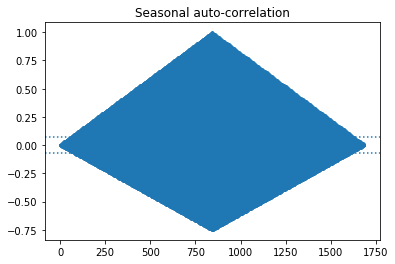

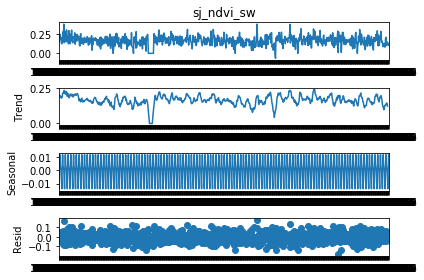

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


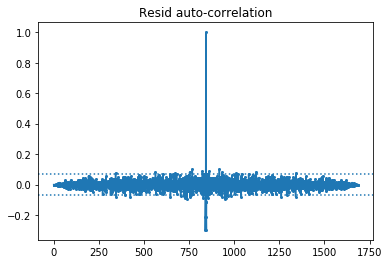

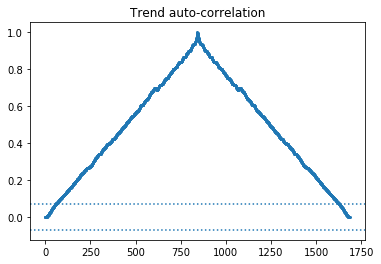

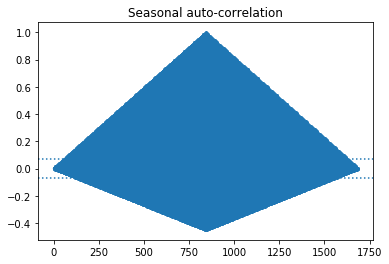

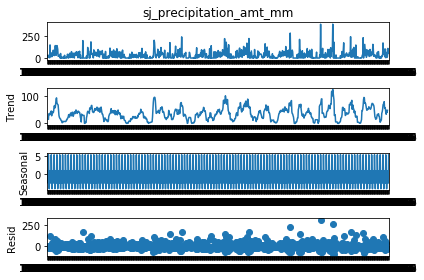

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


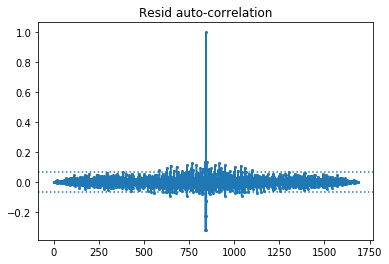

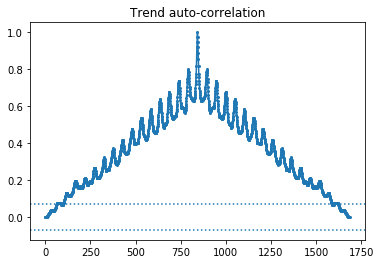

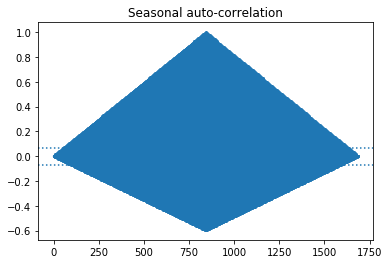

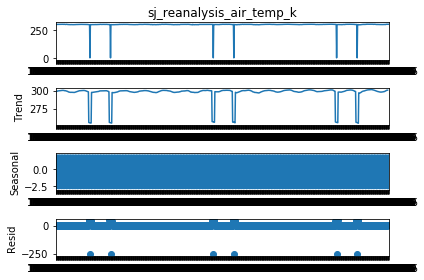

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


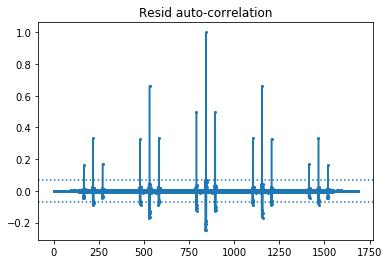

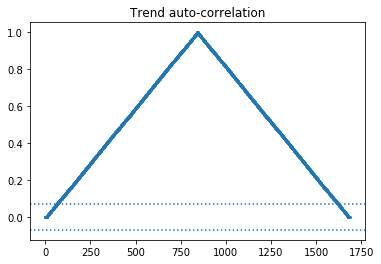

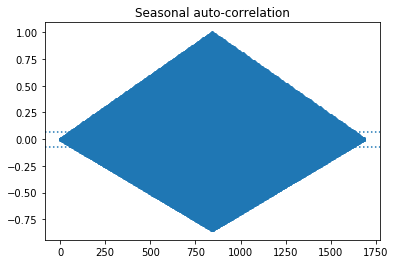

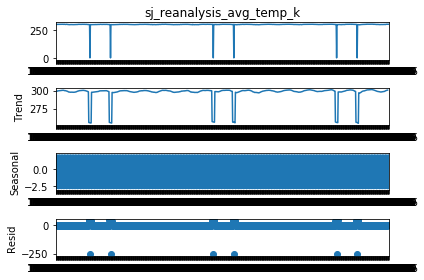

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


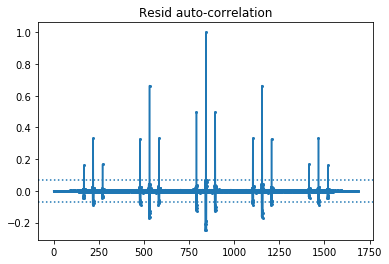

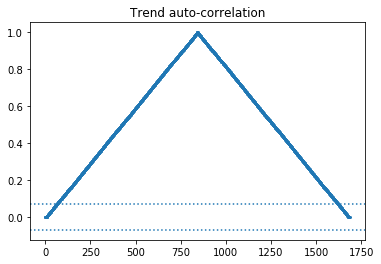

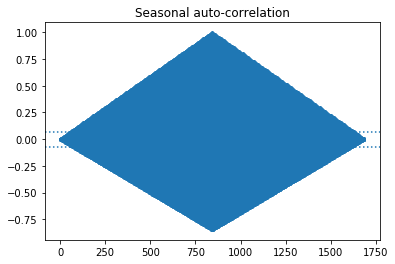

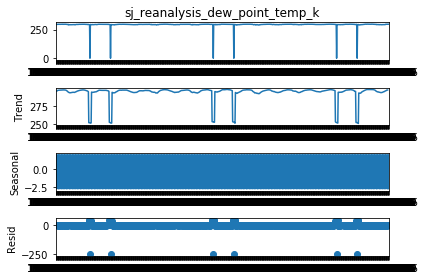

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


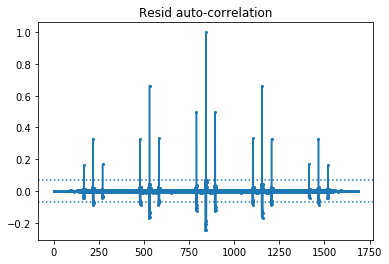

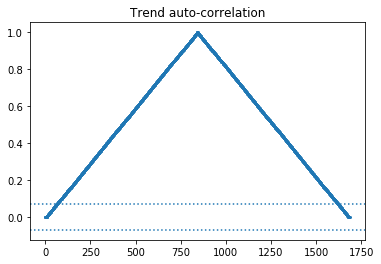

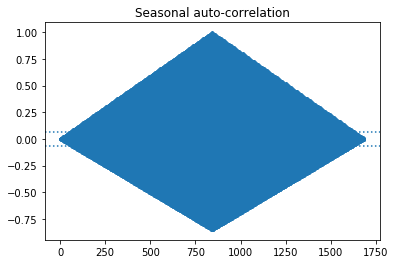

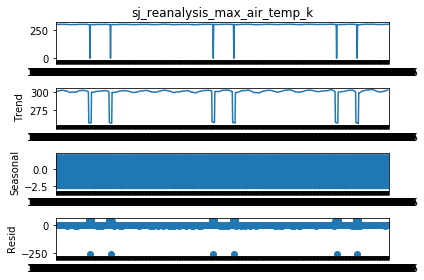

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


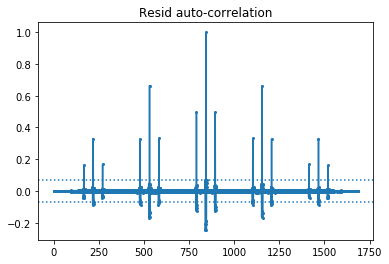

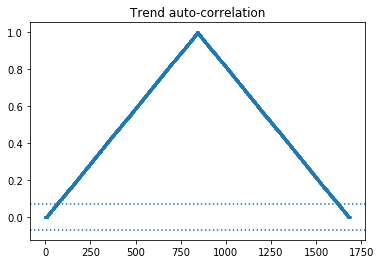

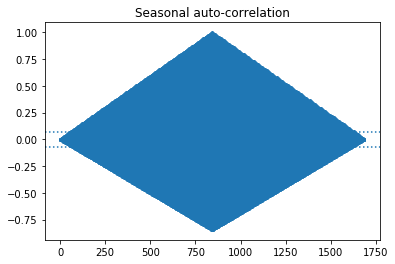

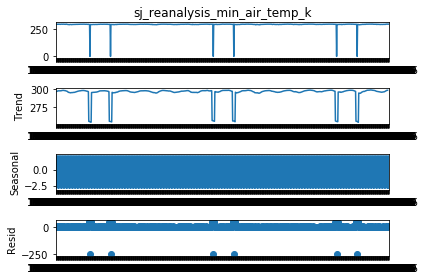

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


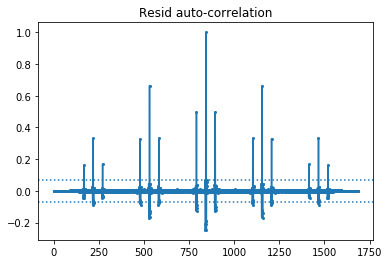

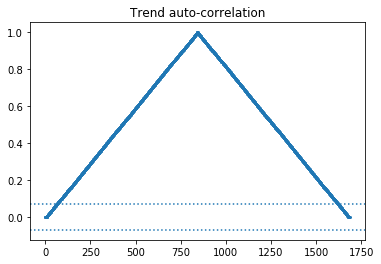

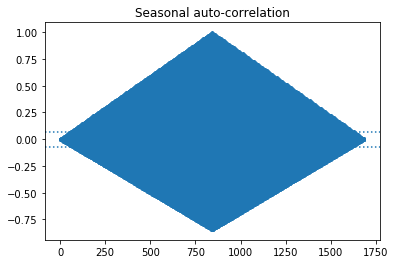

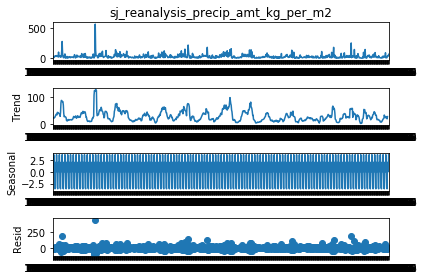

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


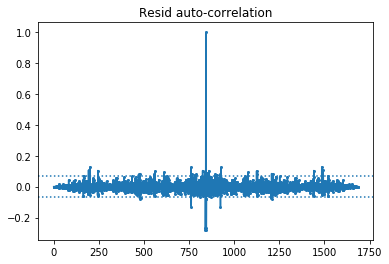

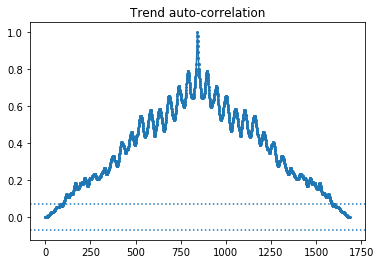

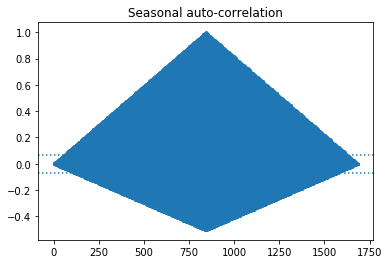

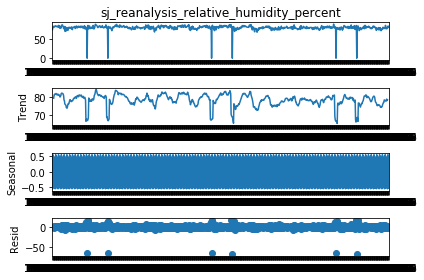

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


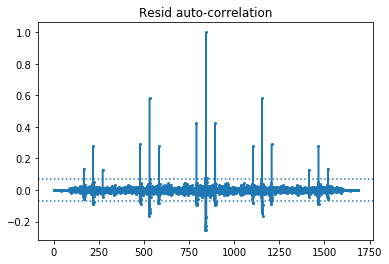

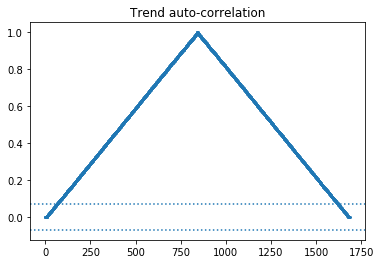

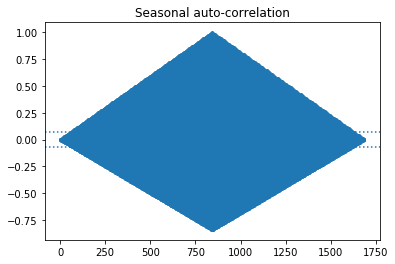

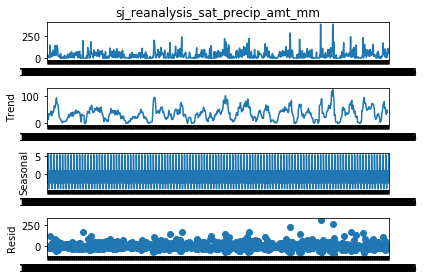

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


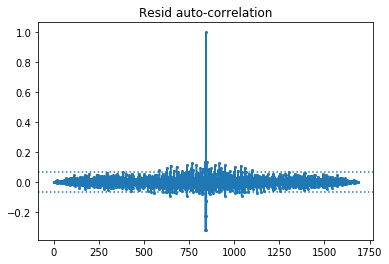

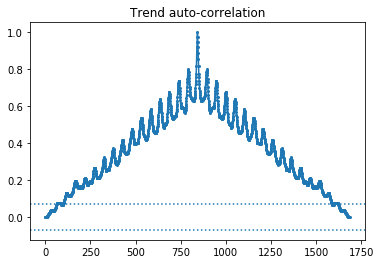

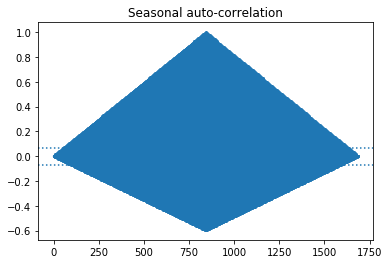

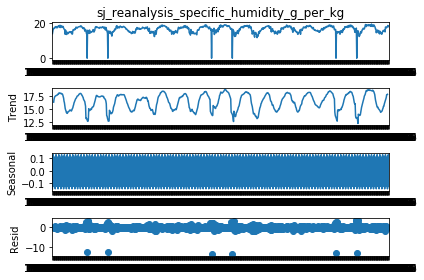

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


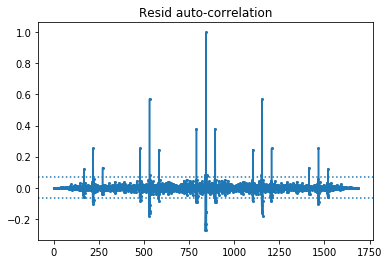

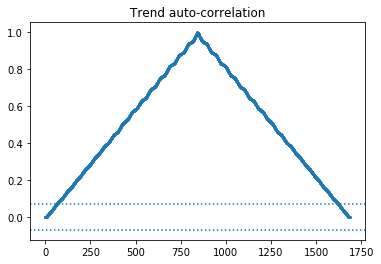

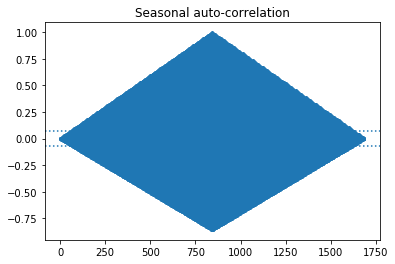

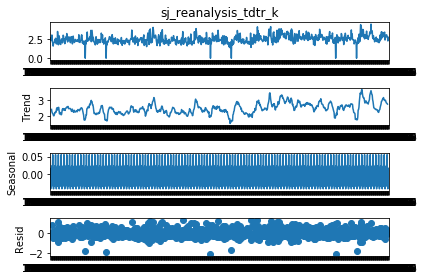

Resid is white noise?  True
Resid is seasonal noise?  False
Resid is trended noise?  False
Resid is seasonal and trended noise?  False


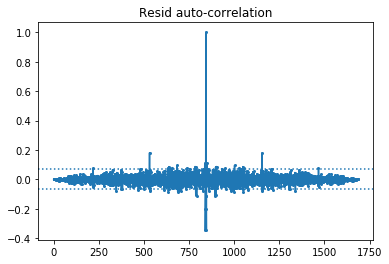

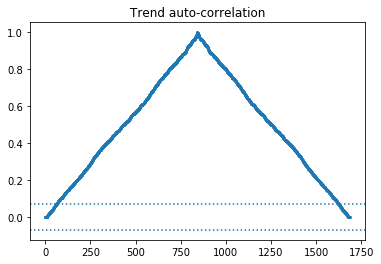

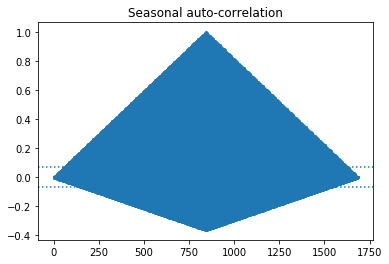

In [ ]:
for i in range(0,30):    
    for col in df_filled.columns:
        resid, trend, seasonal = decompose_and_plot(df_filled.loc[:,col], True)
        df_decomposed_resid[col] = resid
        df_decomposed_trend[col] = trend
        df_decomposed_seasonal[col] = seasonal
    for col in df_filled_test.columns:
        resid, trend, seasonal = decompose_and_plot(df_filled_test.loc[:,col])
        df_decomposed_resid_test[col] = resid
        df_decomposed_trend_test[col] = trend
        df_decomposed_seasonal_test[col] = seasonal

    df_final_resid = df_decomposed_resid.mask(df_nan == True, np.nan)
    df_final_trend = df_decomposed_trend.mask(df_nan == True, np.nan)
    df_final_seasonal = df_decomposed_seasonal.mask(df_nan == True, np.nan)

    df_final_resid_test = df_decomposed_resid_test.mask(df_nan_test == True, np.nan)
    df_final_trend_test = df_decomposed_trend_test.mask(df_nan_test == True, np.nan)
    df_final_seasonal_test = df_decomposed_seasonal_test.mask(df_nan_test == True, np.nan)

    df_white_noise_train, df_white_noise_test =  meanImputation.input(df_final_resid, df_final_resid_test)
    df_seasonal_train, df_seasonal_test = splineInterpolation.input(df_final_seasonal, df_final_seasonal_test)
    df_trended_train, df_trended_test = forwardFilling.input(df_final_trend, df_final_trend_test)

    df_final_train = df_white_noise_train + df_seasonal_train + df_trended_train
    df_final_test = df_white_noise_test + df_seasonal_test + df_trended_test

    df_final_train.to_csv(r'output\/CompleteDengueTrain_decomp_'+str(i)+'.csv', index = True)
    df_final_test.to_csv(r'output\/CompleteDengueTest_decomp_'+str(i)+'.csv', index = True)